<a href="https://colab.research.google.com/github/Ahmad1993Aj/Increasing_Breast_Cancer_Awareness_Pycaret_Classification/blob/main/Increasing_Breast_Cancer_Awareness_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/breast_cancer_survival.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [3]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [5]:
df.drop("Date_of_Last_Visit", axis=1, inplace=True)
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
0,42,FEMALE,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,Alive
1,54,FEMALE,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,Dead


In [6]:
mode_value = df['Patient_Status'].mode()[0]
df['Patient_Status'].fillna(mode_value, inplace=True)

In [7]:
df.isnull().sum()

Age                0
Gender             0
Protein1           0
Protein2           0
Protein3           0
Protein4           0
Tumour_Stage       0
Histology          0
ER status          0
PR status          0
HER2 status        0
Surgery_type       0
Date_of_Surgery    0
Patient_Status     0
dtype: int64

In [8]:
!pip install pycaret

!pip install mlflow
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 120.8 MB/s eta 0

In [9]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.050638,-0.021542,-0.039686,0.094214
Protein1,-0.050638,1.000000,0.238141,-0.129482,0.280343
Protein2,-0.021542,0.238141,1.000000,-0.415825,0.088239
Protein3,-0.039686,-0.129482,-0.415825,1.000000,0.065316
Protein4,0.094214,0.280343,0.088239,0.065316,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              334 non-null    int64  
 1   Gender           334 non-null    object 
 2   Protein1         334 non-null    float64
 3   Protein2         334 non-null    float64
 4   Protein3         334 non-null    float64
 5   Protein4         334 non-null    float64
 6   Tumour_Stage     334 non-null    object 
 7   Histology        334 non-null    object 
 8   ER status        334 non-null    object 
 9   PR status        334 non-null    object 
 10  HER2 status      334 non-null    object 
 11  Surgery_type     334 non-null    object 
 12  Date_of_Surgery  334 non-null    object 
 13  Patient_Status   334 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 36.7+ KB


In [12]:
from pycaret.classification import *

In [13]:
classification_experiment = setup(data=df, target='Patient_Status', session_id=42, log_experiment=True)

,Description,Value
0,Session id,42
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(334, 14)"
5,Transformed data shape,"(334, 21)"
6,Transformed train set shape,"(233, 21)"
7,Transformed test set shape,"(101, 21)"
8,Ordinal features,2
9,Numeric features,5


2023/08/03 19:17:55 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [14]:
best = classification_experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8071,0.5774,0.0250,0.1000,0.0400,0.0355,0.0465,1.0190
dummy,Dummy Classifier,0.8027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3310
ridge,Ridge Classifier,0.7815,0.0000,0.0200,0.0500,0.0286,-0.0146,-0.0173,0.3100
knn,K Neighbors Classifier,0.7770,0.4960,0.0700,0.2000,0.1019,0.0307,0.0378,0.4420
rf,Random Forest Classifier,0.7692,0.6416,0.1800,0.2483,0.2007,0.0989,0.0966,1.0450
et,Extra Trees Classifier,0.7650,0.6408,0.1800,0.2483,0.2007,0.0928,0.0918,1.2160
lda,Linear Discriminant Analysis,0.7609,0.6345,0.2250,0.3000,0.2424,0.1186,0.1217,0.3910
gbc,Gradient Boosting Classifier,0.7520,0.6046,0.2850,0.3043,0.2852,0.1472,0.1464,0.7830
nb,Naive Bayes,0.7393,0.5553,0.2650,0.2619,0.2433,0.1044,0.1069,0.3560
lightgbm,Light Gradient Boosting Machine,0.7348,0.6026,0.2450,0.2858,0.2540,0.1081,0.1064,0.6460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [15]:
# functional API
evaluate_model(best)

# OOP API
classification_experiment.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

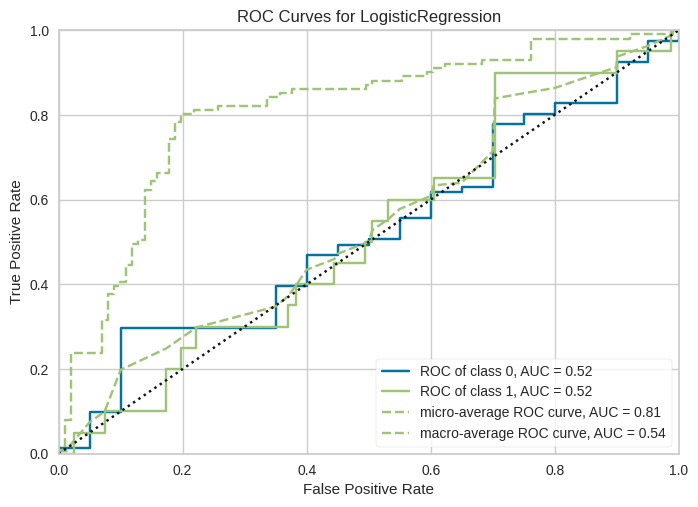

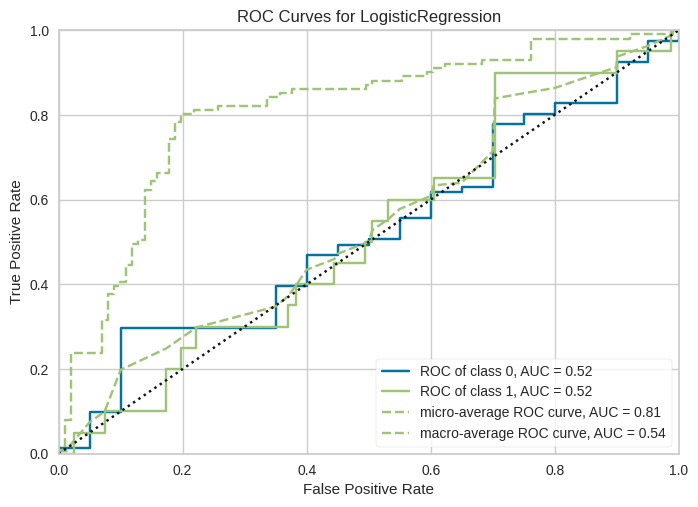

In [16]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
classification_experiment.plot_model(best, plot = 'auc')

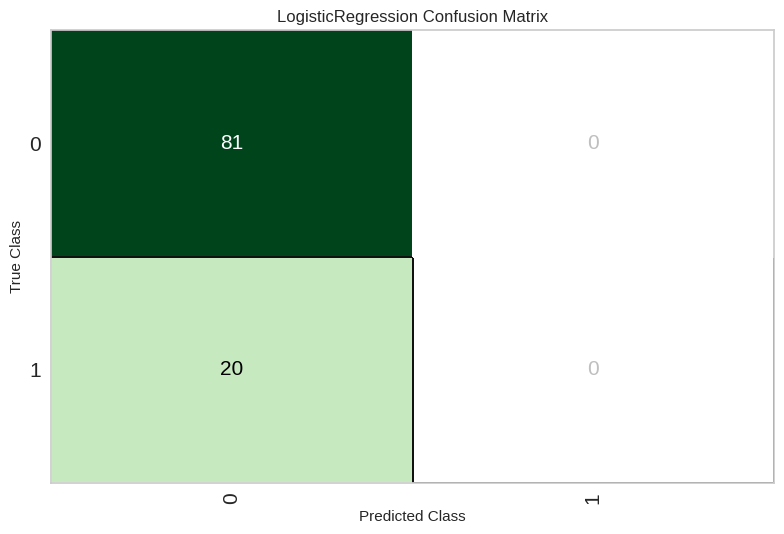

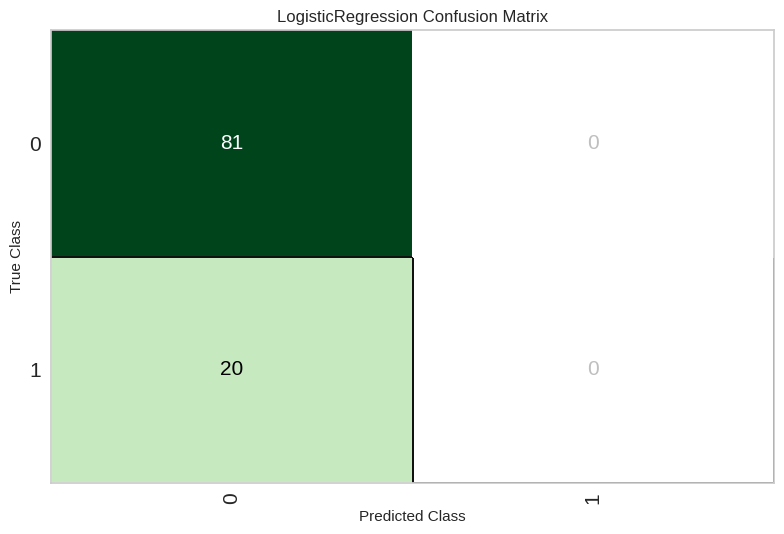

In [17]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
classification_experiment.plot_model(best, plot = 'confusion_matrix')

In [19]:
# functional API
predict_model(best)

# OOP API
classification_experiment.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8020,0.5198,0.0000,0.0000,0.0000,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8020,0.5198,0.0000,0.0000,0.0000,0.0000,0.0000


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status,prediction_label,prediction_score
8,58,FEMALE,-1.268500,0.10613,1.13520,-0.394920,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,0,Alive,0.7825
124,85,FEMALE,0.403840,0.48825,0.84111,0.616450,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-May-18,0,Alive,0.7659
251,47,FEMALE,-0.525290,1.12240,0.43712,0.624100,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,11-Mar-18,1,Alive,0.6498
319,53,FEMALE,0.014106,-0.68397,0.53815,0.718970,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Aug-18,0,Alive,0.7819
272,67,FEMALE,0.317420,-0.55585,0.35657,0.797330,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,02-Oct-19,0,Alive,0.7594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,45,FEMALE,-0.278070,1.42910,-0.57895,0.222640,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,06-Mar-19,1,Alive,0.8277
139,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,1,Alive,0.8533
225,64,FEMALE,-0.969950,-0.76926,0.55680,-0.720150,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,03-Oct-18,1,Alive,0.9452
159,47,FEMALE,-0.198190,0.62597,-0.28137,-0.477740,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,10-Jul-19,0,Alive,0.9142


In [21]:
# functional API
predictions = predict_model(best, data=df)
predictions.head()

# OOP API
predictions = classification_experiment.predict_model(best, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8054,0.7135,0.0152,1.0000,0.0299,0.0241,0.1104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8054,0.7135,0.0152,1.0000,0.0299,0.0241,0.1104


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status,prediction_label,prediction_score
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,0,Alive,0.7217
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,1,Alive,0.7298
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,0,Alive,0.8375
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,0,Alive,0.8183
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,0,Alive,0.9173


In [22]:
# functional API
save_model(best, 'my_best_pipeline')

# OOP API
classification_experiment.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_e...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
       

In [24]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

# OOP API
loaded_model = classification_experiment.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Protein1', 'Protein2',
                                             'Protein3', 'Protein4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_e...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
  

In [25]:
################# Ende der Classification ##############